In [38]:
import sys
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

from IPython.display import Audio

# Original file

In [41]:
Audio('../datasets/cnn_examples/helloworld.wav')
Audio

numpy signal:  (18432,)


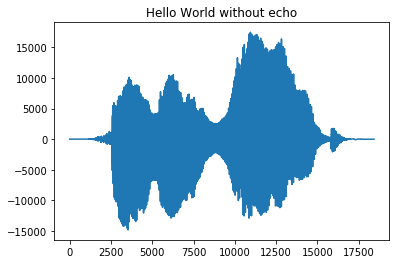

In [42]:
spf = wave.open('../datasets/cnn_examples/helloworld.wav', 'r')

signal = spf.readframes(-1)
signal = np.fromstring(signal, dtype=np.int16)
print('numpy signal: ', signal.shape)

Audio('../datasets/cnn_examples/helloworld.wav')
plt.plot(signal)
plt.title('Hello World without echo')
plt.show()

# Convolution with an Impulse response

In [43]:
delta = np.array([1.0, 0.0, 0.0])
noecho = np.convolve(signal, delta)
print('noecho signal: ', noecho.shape)
assert(np.abs(noecho[:len(signal)] - signal).sum() < 0.000001)

noecho = noecho.astype(np.int16)
write('noecho.wav', 16000, noecho)

noecho signal:  (18434,)


In [44]:
Audio('noecho.wav')

# Adding some echo

In [47]:
filt = np.zeros(16000)
filt[0] = 1
filt[4000] = 0.6
filt[8000] = 0.3
filt[12000] = 0.2
filt[15999] = 0.1
out = np.convolve(signal, filt)

out = out.astype(np.int16)
write('out.wav', 16000, out)

In [45]:
Audio('out.wav')

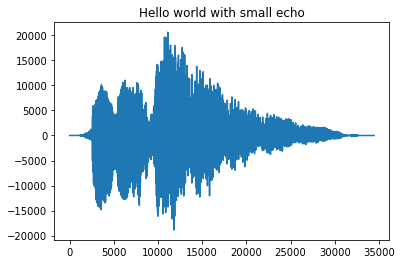

In [46]:
plt.plot(out)
plt.title("Hello world with small echo")
plt.show()